# Second Model: Artificial Neural Network (ANN)

## Fetch Processed Data

In [1]:
!git clone https://github.com/mickjeon/amazon_sales_prediction.git

Cloning into 'amazon_sales_prediction'...
remote: Enumerating objects: 83, done.
remote: Counting objects: 100% (83/83), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 83 (delta 27), reused 47 (delta 6), pack-reused 0
Receiving objects: 100% (83/83), 8.67 MiB | 8.74 MiB/s, done.
Resolving deltas: 100% (27/27), done.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('amazon_sales_prediction/data.csv')
data.head()

,sub_category,ratings,no_of_ratings,discount_price_usd,actual_price_usd,discount_rate,agg_rating
0,0,4.1,2092.0,4.590915,7.205687,36.287625,8577.2
1,1,4.4,7943.0,132.534040,240.872394,44.977489,34949.2
2,0,3.8,229.0,2.482227,12.049645,79.400000,870.2
3,0,3.7,33.0,2.156886,18.062417,88.058706,122.1
4,2,3.6,37.0,0.409688,0.590433,30.612245,133.2


## Artificial Neural Network

In [4]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split

y = data['ratings']
X = data.drop('ratings', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2500, 6)
(278, 6)
(2500,)
(278,)


In [17]:
model = Sequential()

model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mse', metrics=['mean_absolute_error'])

In [18]:
history = model.fit(X_train, y_train, batch_size = 4, epochs = 100, verbose = 1, validation_split=0.1)

Epoch 1/100
563/563 [==============================] - 2s 2ms/step - loss: 155351.5312 - mean_absolute_error: 76.7369 - val_loss: 532.7772 - val_mean_absolute_error: 11.1437
Epoch 2/100
563/563 [==============================] - 2s 3ms/step - loss: 59308.6211 - mean_absolute_error: 58.4467 - val_loss: 209.3375 - val_mean_absolute_error: 7.0601
Epoch 3/100
563/563 [==============================] - 2s 4ms/step - loss: 40005.7969 - mean_absolute_error: 41.5195 - val_loss: 1127.5575 - val_mean_absolute_error: 11.6364
Epoch 4/100
563/563 [==============================] - 1s 2ms/step - loss: 28795.5332 - mean_absolute_error: 35.3939 - val_loss: 419.3326 - val_mean_absolute_error: 8.1665
Epoch 5/100
563/563 [==============================] - 1s 2ms/step - loss: 21699.1211 - mean_absolute_error: 34.4678 - val_loss: 1279.7585 - val_mean_absolute_error: 11.7002
Epoch 6/100
563/563 [==============================] - 2s 3ms/step - loss: 24999.9316 - mean_absolute_error: 33.5229 - val_loss: 2077.

In [19]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Testing MSE for baseline ANN: {mse}')

9/9 [==============================] - 0s 4ms/step
Testing MSE for baseline ANN: 0.13763889018454747


In [8]:
y_test.to_numpy()
y_test_2d = y_test[:,np.newaxis]
direct_comparison = np.concatenate((y_pred, y_test_2d), axis=1)
direct_comparison

<ipython-input-8-fbbb55cda350>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y_test_2d = y_test[:,np.newaxis]


array([[4.07174253, 3.9       ],
       [4.07174253, 4.1       ],
       [4.07174253, 4.        ],
       [4.07174253, 4.2       ],
       [4.07174253, 4.1       ],
       [3.68169785, 3.7       ],
       [4.07174253, 4.1       ],
       [4.07174253, 3.7       ],
       [4.07174253, 4.5       ],
       [3.58245325, 3.6       ],
       [4.07174253, 4.1       ],
       [4.07174253, 4.        ],
       [4.07174253, 4.4       ],
       [4.07174253, 4.3       ],
       [4.07174253, 4.3       ],
       [4.07174253, 3.8       ],
       [4.07174253, 4.        ],
       [3.34517145, 3.4       ],
       [4.07174253, 4.5       ],
       [3.82455492, 3.7       ],
       [4.07174253, 4.2       ],
       [4.07174253, 4.5       ],
       [4.07174253, 4.2       ],
       [4.07174253, 4.1       ],
       [4.07174253, 4.        ],
       [4.07174253, 4.4       ],
       [4.07174253, 4.        ],
       [4.07174253, 4.        ],
       [4.07174253, 4.3       ],
       [4.07174253, 4.3       ],
       [4.

### Loss and Mean Absoulte Error plotting

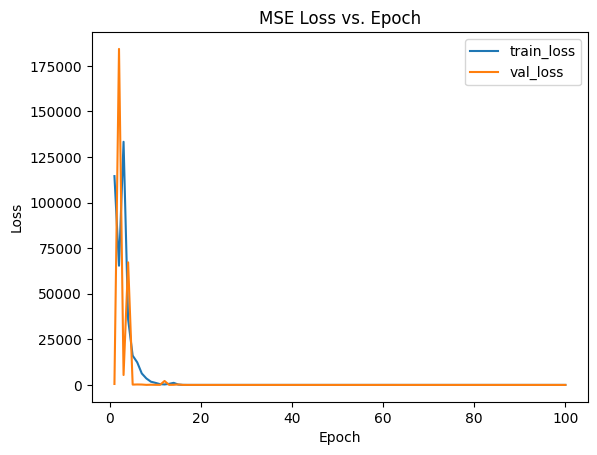

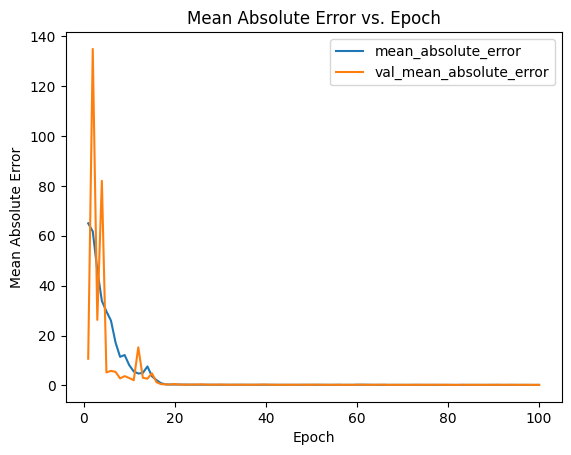

In [9]:
epoch = np.arange(1, len(history.history['loss']) + 1)

plt.plot(epoch, history.history['loss'], label='train_loss')
plt.plot(epoch, history.history['val_loss'], label='val_loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('MSE Loss vs. Epoch')
plt.show()

plt.plot(epoch, history.history['mean_absolute_error'], label='mean_absolute_error')
plt.plot(epoch, history.history['val_mean_absolute_error'], label='val_mean_absolute_error')

plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('Mean Absolute Error vs. Epoch')
plt.show()

Starting from 12nd epoch

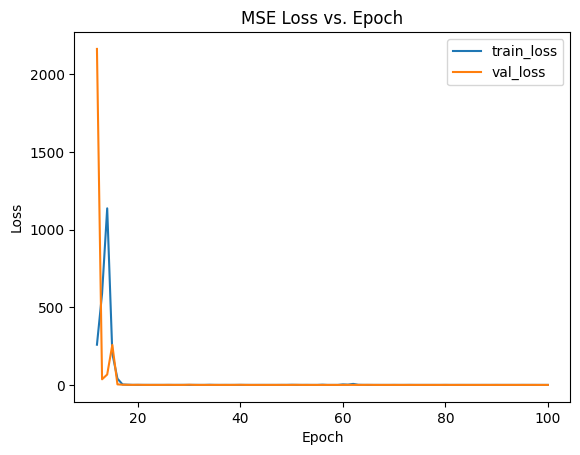

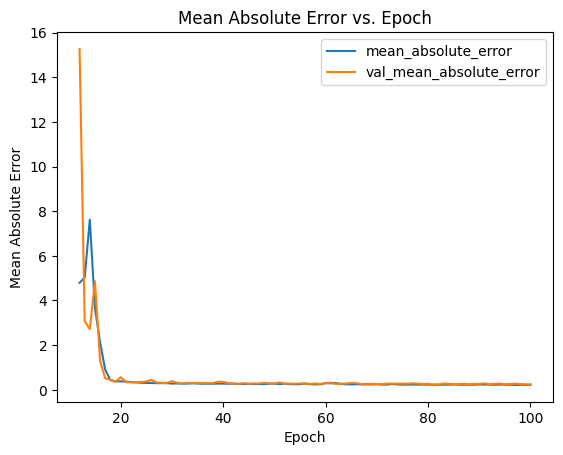

In [10]:
epoch = np.arange(12, len(history.history['loss']) + 1)

plt.plot(epoch, history.history['loss'][11:], label='train_loss')
plt.plot(epoch, history.history['val_loss'][11:], label='val_loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('MSE Loss vs. Epoch')
plt.show()

plt.plot(epoch, history.history['mean_absolute_error'][11:], label='mean_absolute_error')
plt.plot(epoch, history.history['val_mean_absolute_error'][11:], label='val_mean_absolute_error')

plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('Mean Absolute Error vs. Epoch')
plt.show()

## KFold Cross Validation

In [11]:
pip install scikeras

In [12]:
from sklearn.model_selection import RepeatedKFold, cross_validate
from scikeras.wrappers import KerasRegressor


def create_model():
  model = Sequential()
  model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(1, activation='linear'))
  model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mean_absolute_error'])
  return model


model = KerasRegressor(model=create_model, epochs=100, batch_size=4, verbose=1)
kfold = RepeatedKFold(n_splits = 5, n_repeats = 1)
results = cross_validate(model, X_train.to_numpy(), y_train.to_numpy(), cv=kfold, n_jobs = 1)

Epoch 1/100
500/500 [==============================] - 3s 3ms/step - loss: 2539526.7500 - mse: 2539526.7500 - mean_absolute_error: 268.4143
Epoch 2/100
500/500 [==============================] - 2s 4ms/step - loss: 2790.1707 - mse: 2790.1707 - mean_absolute_error: 18.9137
Epoch 3/100
500/500 [==============================] - 2s 4ms/step - loss: 4291.9629 - mse: 4291.9629 - mean_absolute_error: 19.4635
Epoch 4/100
500/500 [==============================] - 2s 4ms/step - loss: 9934.1445 - mse: 9934.1445 - mean_absolute_error: 22.3507
Epoch 5/100
500/500 [==============================] - 2s 4ms/step - loss: 1546.5947 - mse: 1546.5947 - mean_absolute_error: 9.0396
Epoch 6/100
500/500 [==============================] - 2s 5ms/step - loss: 4343.8774 - mse: 4343.8774 - mean_absolute_error: 16.8971
Epoch 7/100
500/500 [==============================] - 3s 5ms/step - loss: 113.2748 - mse: 113.2748 - mean_absolute_error: 5.1175
Epoch 8/100
500/500 [==============================] - 2s 4ms/step

In [13]:
results

{'fit_time': array([143.63423824, 109.85579085, 143.29090261, 142.92078876,
        142.92627859]),
 'score_time': array([0.34019375, 0.33605814, 0.35694742, 0.41700459, 0.3684485 ]),
 'test_score': array([0.09048674, 0.30394755, 0.26611671, 0.28035449, 0.14005729])}

In [16]:
print(f'Average Test MSE: {results["test_score"].mean()}')

Average Test MSE: 0.21619255865326553
